In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pytrans.ions import Ion
from pytrans.analysis.mode_solver import HarmonicTrap, mode_solver, init_crystal

from pytrans.analysis import analyse_potential


Yb171 = Ion('Yb171', mass_amu=170.936323)


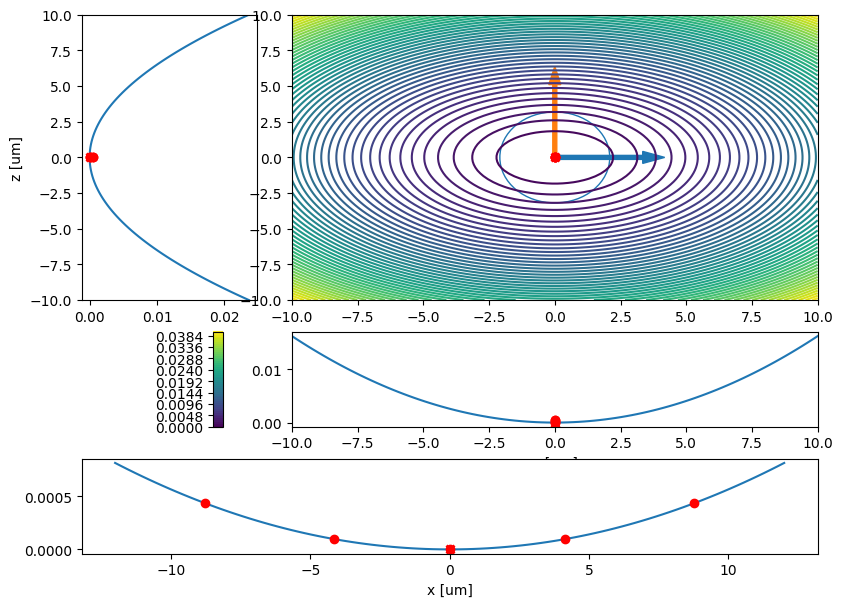

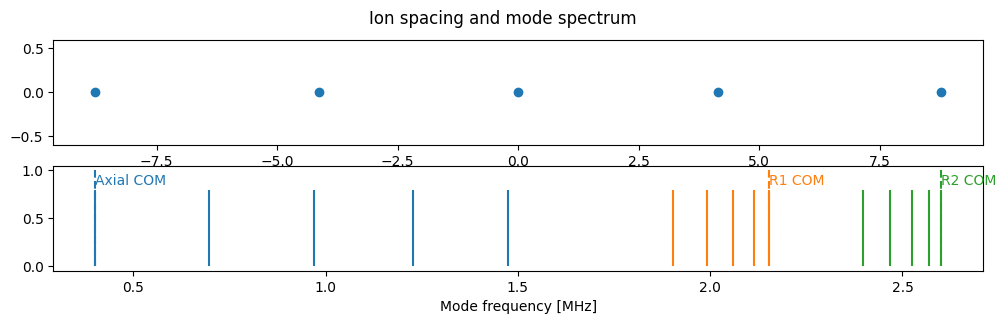

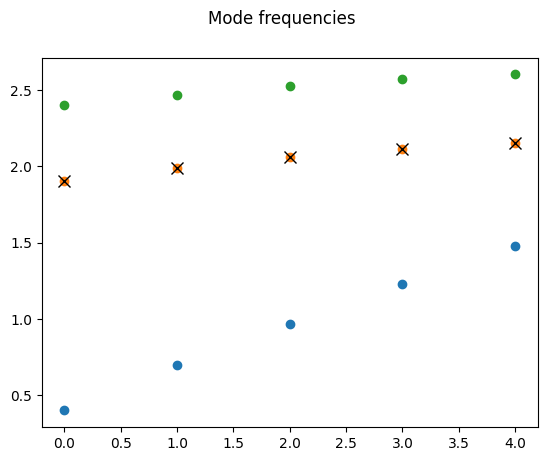

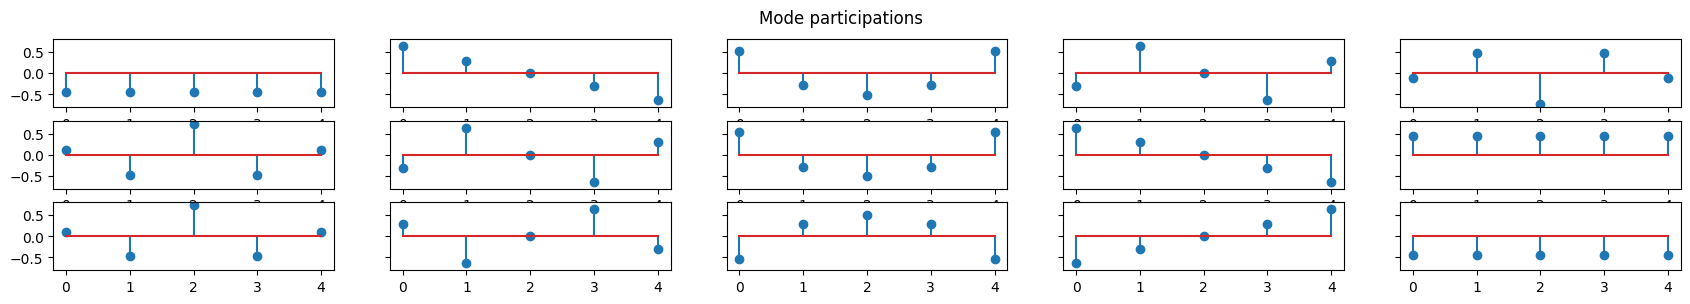

In [5]:
wx, wy, wz = 0.402e6, 2.153e6, 2.6e6
trap_freqs = np.asarray([wx, wy, wz])

trap = HarmonicTrap(wx, wy, wz, ion=Yb171)
n_ions = 5

ions = [Yb171] * n_ions
result = analyse_potential(trap, voltages=None, ions=ions, ion1=ions[0], r0=(0, 0, 0), roi=(12e-6, 1e-5, 1e-5), verbose=False)
# result = mode_solver(trap, voltages=None, ions=ions, x0=x0)


fig, (ax0, ax) = plt.subplots(2, 1, figsize=(12, 3), gridspec_kw=dict())
fig.suptitle("Ion spacing and mode spectrum")

mode_freqs = result.mode_solver_results.mode_freqs
mode_vectors = result.mode_solver_results.mode_vectors
x_eq = result.mode_solver_results.x_eq

ax0.plot(x_eq[:, 0] * 1e6, x_eq[:, 1] * 1e6, 'o')
ax0.set_ylim(-0.6, 0.6)

# projections of normal modes on single-ion eigenmodes
v1 = np.eye(3)
proj = abs(np.einsum('Mai,im', mode_vectors, v1)).sum(1)
mode1_index = np.argmax(proj, axis=1)

colors = np.asarray(['k'] * len(mode_freqs), dtype=object)
for j in range(3):
    colors[np.where(mode1_index == j)] = f"C{j}"


ax.vlines(mode_freqs * 1e-6, 0, 0.8, colors=colors)
ax.vlines(trap_freqs * 1e-6, 0, 1, colors=[f"C{j}" for j in range(3)], linestyle='--')
ax.text(trap_freqs[0] * 1e-6, 0.85, 'Axial COM', color="C0")
ax.text(trap_freqs[1] * 1e-6, 0.85, 'R1 COM', color="C1")
ax.text(trap_freqs[2] * 1e-6, 0.85, 'R2 COM', color="C2")

ax0.set(
    xlabel='x [um]'
)
ax.set(
    xlabel='Mode frequency [MHz]'
)

fig, ax = plt.subplots()
fig.suptitle('Mode frequencies')
mode_labels = []
for j in range(3):
    mode_labels.append(np.where(mode1_index == j)[0])

for j in range(3):
    ax.plot(mode_freqs[mode_labels[j]] * 1e-6, 'o')

rfreqs = [1.905, 1.985, 2.057, 2.114, 2.153]
ax.plot(rfreqs, 'xk', ms=9)



fig, axess = plt.subplots(3, len(mode_labels[j]), figsize=(21, 3), sharey=True)
fig.suptitle(f'Mode participations')

for j, axes in enumerate(axess):
    mode_vectors_1 = mode_vectors[mode_labels[j]][:, :, j]
    for mode, ax in enumerate(axes):
        ax.stem(mode_vectors_1[mode])


In [7]:
result

--------------
Trap potential analysis for ion Yb171: 
Equilibrium position [um]
[0. 0. 0.]
Gradient [V/m]
[0. 0. 0.]
Displacement at 1 MHz [um]
[0. 0. 0.]
Hessian [V/m2]
[[1.1303e+07 0.0000e+00 0.0000e+00]
 [0.0000e+00 3.2421e+08 0.0000e+00]
 [0.0000e+00 0.0000e+00 4.7280e+08]]
Normal mode frequencies [MHz]
[0.402 2.153 2.6]
Eigenvectors
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Tilt angle of mode 2 (2.60): 90.00°
--------------
Mode solver analysis for ion crystal [Yb171, Yb171, Yb171, Yb171, Yb171]: 
Equilibrium positions [um]
[[-8.7699  0.      0.    ]
 [-4.1366  0.      0.    ]
 [-0.      0.      0.    ]
 [ 4.1366  0.      0.    ]
 [ 8.7699  0.      0.    ]]
Normal modes
  Freq [MHz]                   Yb171                               Yb171                               Yb171                               Yb171                               Yb171
------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  --